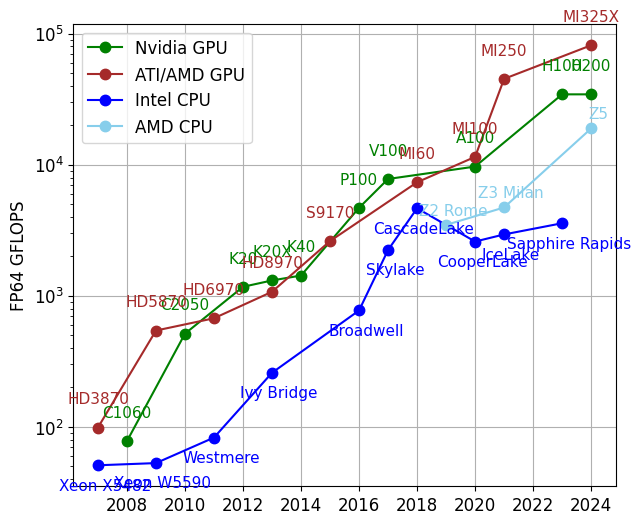

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.rcParams.update({'font.size': 12})

NV="data-dp-nvidia.txt"
Intel="data-intel.txt"
AMDMI="data-amd.txt"
AMDCPU="data-amd-cpus.txt"

# Load data, ignoring lines starting with '#'
dfnv = pd.read_csv(NV, comment='#', sep="\\s+", usecols=[0, 1,3,4,7], names=['Year', 'GFLOPS', 'BW', 'TDP', 'Label'])
dfmi = pd.read_csv(AMDMI, comment='#', sep="\\s+", usecols=[0, 2,4,5,8], names=['Year', 'GFLOPS','BW',  'TDP', 'Label'])
dfintel = pd.read_csv(Intel, comment='#', sep="\\s+", usecols=[0, 2,4,5,7], names=['Year', 'GFLOPS','BW', 'TDP', 'Label'])
dfeypc = pd.read_csv(AMDCPU, comment='#', sep="\\s+", usecols=[0, 2,4,5,7], names=['Year', 'GFLOPS','BW', 'TDP', 'Label'])

labels = ["Nvidia GPU", "ATI/AMD GPU", "Intel CPU", "AMD CPU"  ]
color = ["green", "brown", "blue", "skyblue"  ]
offsets =[(0,15), (0,15), (5, -20), (5,5)  ]
dfs=[dfnv, dfmi, dfintel, dfeypc]

# Create plot
plt.figure(figsize=(7, 6))

for la, co, df, off in zip(labels, color, dfs, offsets):
    #plt.scatter(df['Year'], df['GFLOPS'], color=co)
    plt.plot(df['Year'], df['GFLOPS'], ".-", color=co, markersize=15, label=la)
    
    # Add text annotations with offset
    for i, row in df.iterrows():
        plt.annotate(row['Label'], (row['Year'], row['GFLOPS']), fontsize=11, ha='center',
                     va='bottom', xytext=off, textcoords='offset points', color=co)
    
# Set labels, title, and log scale for y-axis
plt.ylabel('FP64 GFLOPS')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))


# Show plot
plt.savefig("gpucpuTrend.png", dpi=300, bbox_inches='tight')


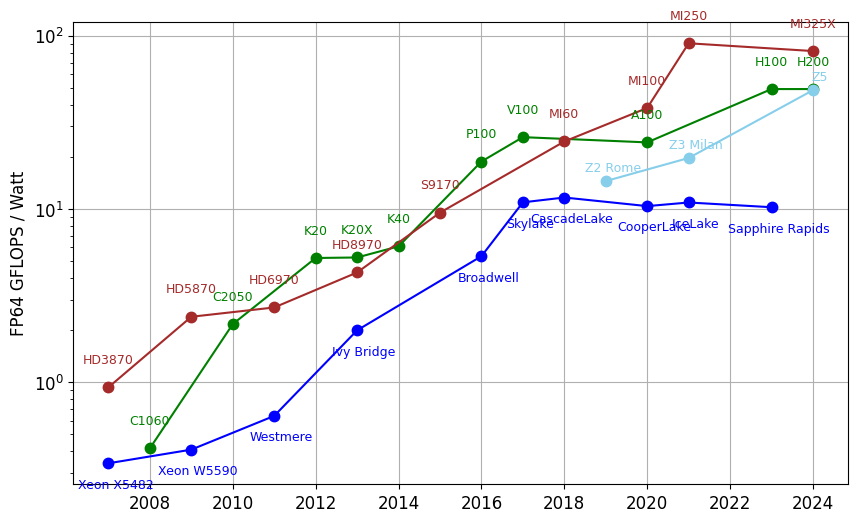

In [2]:
# Create plot
plt.figure(figsize=(10, 6))

for la, co, df, off in zip(labels, color, dfs, offsets):
    peff = df['GFLOPS']/df['TDP']
    plt.plot(df['Year'], peff, ".-", color=co, markersize=15, label=la)
    
    # Add text annotations with offset
    for l,y,p in zip(df['Label'], df['Year'], peff):
        plt.annotate(l, (y, p), fontsize=9, ha='center',
                     va='bottom', xytext=off, textcoords='offset points', color=co)
    
# Set labels, title, and log scale for y-axis
plt.ylabel('FP64 GFLOPS / Watt')
plt.yscale('log')
#plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))


# Show plot
plt.savefig("gpucpuPowerTrend.png", dpi=300, bbox_inches='tight')


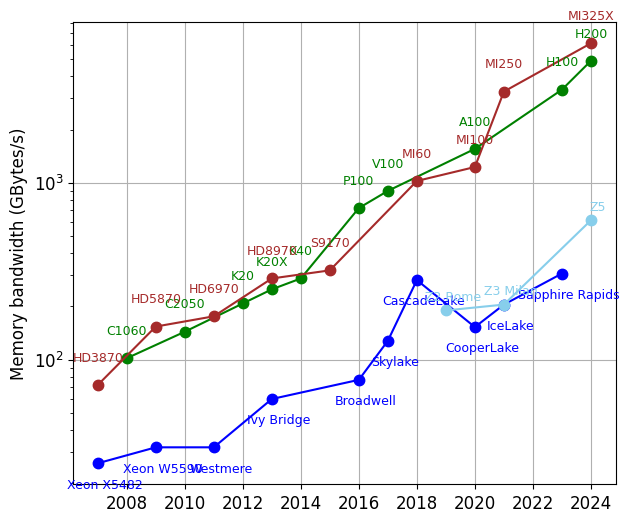

In [3]:
# Create plot
plt.figure(figsize=(7, 6))

for la, co, df, off in zip(labels, color, dfs, offsets):
    plt.plot(df['Year'], df['BW'], ".-", color=co, markersize=15, label=la)
    
    # Add text annotations with offset
    for l,y,p in zip(df['Label'], df['Year'], df['BW']):
        plt.annotate(l, (y, p), fontsize=9, ha='center',
                     va='bottom', xytext=off, textcoords='offset points', color=co)
    
# Set labels, title, and log scale for y-axis
plt.ylabel('Memory bandwidth (GBytes/s)')
plt.yscale('log')
#plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))


# Show plot
plt.savefig("gpucpuBWTrend.png", dpi=300, bbox_inches='tight')
